In [1]:
# ! conda install ipympl

In [2]:
import numpy as np
from numpy.random import random_sample as rs
import numpy.random as rand
import matplotlib.pyplot as plt
import math
from itertools import combinations
from matplotlib import animation

In [3]:
from points_2D import *

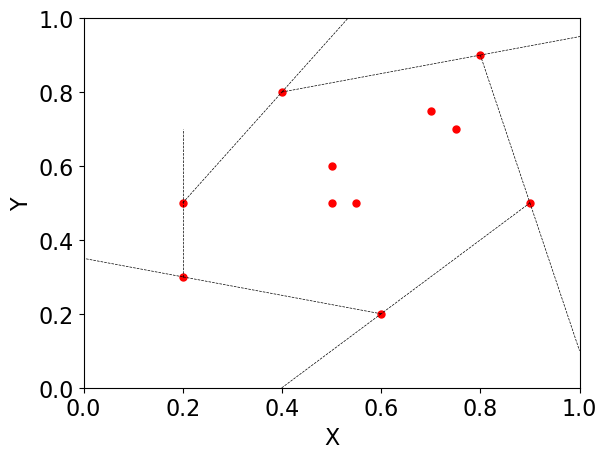

In [4]:
# NW Plot

plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend


# rand.seed(8675309)
# num_points = 11
# points_list = []
# for i in range(num_points):
#     points_list.append(Point(rs(), rs()))
#     points_list[i].plot_point()

points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8), 
               Point(0.7, 0.75), Point(0.75, 0.7)]




num_points = 11
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):
        lines_list.append(Line(point_i, other_point))
        other_other_points = [x for x in other_points if x!=other_point]
        if sum(lines_list[-1].isLeft(other_other_points)) == 0:
            lines_list[-1].plot_line()

plt.savefig('./figures/NW.png', dpi=300)


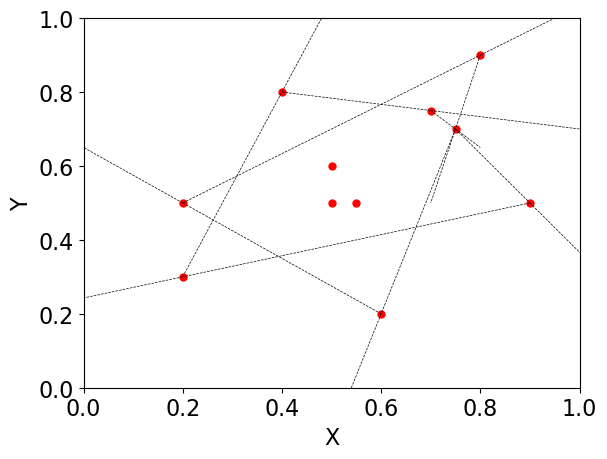

In [5]:
# NE Plot

points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8), 
               Point(0.7, 0.75), Point(0.75, 0.7)]

num_points = 11
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):
        lines_list.append(Line(point_i, other_point))
        other_other_points = [x for x in other_points if x!=other_point]
        if sum(lines_list[-1].isLeft(other_other_points)) == 1:
            lines_list[-1].plot_line()


plt.savefig('./figures/NE.png', dpi=300)

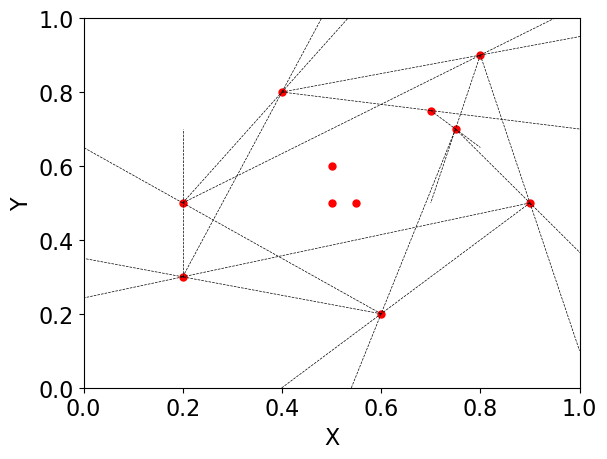

In [6]:
# SW Plot

points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8), 
               Point(0.7, 0.75), Point(0.75, 0.7)]

num_points = 11
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):
        lines_list.append(Line(point_i, other_point))
        other_other_points = [x for x in other_points if x!=other_point]
        if sum(lines_list[-1].isLeft(other_other_points)) == 0 or sum(lines_list[-1].isLeft(other_other_points)) == 1:
            lines_list[-1].plot_line()


plt.savefig('./figures/SW.png', dpi=300)
        

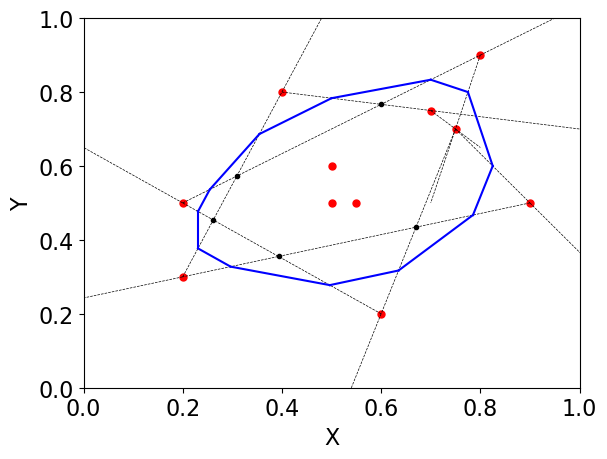

In [7]:
# SE Plot


points_list = [Point(0.2, 0.3), Point(0.2, 0.5), Point(0.5, 0.5), 
               Point(0.5, 0.6), Point(0.55, 0.5), Point(0.6, 0.2), 
               Point(0.9, 0.5), Point(0.8, 0.9), Point(0.4,0.8),
               Point(0.7, 0.75), Point(0.75, 0.7)]

# rand.seed(8675309)
# num_points = 11
# points_list = []
# for i in range(num_points):
#     points_list.append(Point(rs(), rs()))
#     points_list[i].plot_point()

num_points = len(points_list)
for i in range(num_points):
    points_list[i].plot_point()

lines_list = []
idxs = []

poly_points_list = []

for i, point_i in enumerate(points_list):
    other_points = [x for x in points_list if x!=point_i]
    for j, other_point in enumerate(other_points):

        other_other_points = [x for x in other_points if x!=other_point]


        new_line = Line(point_i, other_point)
        bools = new_line.isLeft(other_other_points)

        if sum(bools) == 1:
            new_line.plot_line()
            idxs.append(np.where(bools)[0])
            lines_list.append(new_line)
            poly_points_list.append(new_line.midpoint())


num_lines = len(lines_list)
intersect_points_list = []


for i, j in combinations(range(num_lines), 2):

    line1 = lines_list[i]
    line2 = lines_list[j]

    new_point = intersect(line1, line2)

    if line1.within(new_point) and line2.within(new_point):
        new_point.plot_point(col='k', size=3)
        intersect_points_list.append(new_point)

        midpoint = Line(new_point, line1.point1).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)

        midpoint = Line(new_point, line2.point2).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)

        midpoint = Line(new_point, line1.point2).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)

        midpoint = Line(new_point, line2.point1).midpoint()
        poly_points_list.append(midpoint)
        # midpoint.plot_point(col='b', size=3)



from scipy.spatial import ConvexHull, convex_hull_plot_2d


mat = np.ones((len(poly_points_list), 2))
for i in range(len(poly_points_list)):
    mat[i, 0] = poly_points_list[i].x
    mat[i, 1] = poly_points_list[i].y  

hull = ConvexHull(mat)

# plt.plot(mat[:,0], mat[:,1], 'o')

for simplex in hull.simplices:
    plt.plot(mat[simplex, 0], mat[simplex, 1], 'b-')

plt.savefig('./figures/SE.png', dpi=300)
        

# Extensions into 3D

In [8]:
from points_3D import *

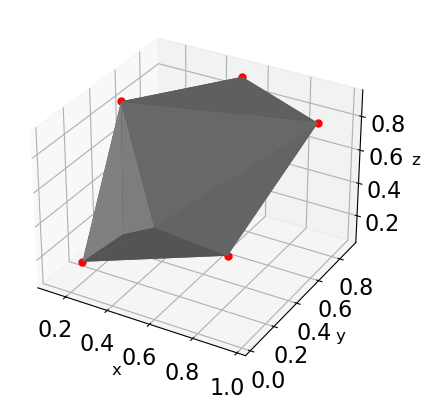

In [9]:
# %matplotlib widget

fig = plt.figure()
ax = plt.axes(projection ='3d')

rand.seed(3)
num_points = 11
points_list = []
for i in range(num_points):
    points_list.append(Point(rs(), rs(), rs()))
    points_list[i].plot_point(ax, col='r')




planes_list = []


for i, j, k in combinations(range(num_points), 3):


    test_plane = Plane(points_list[i], points_list[j], points_list[k])

    other_points = [x for x in points_list if (x!=points_list[i] and x!=points_list[j] and x!=points_list[k])]

    bools = test_plane.isLeft(other_points)

    if sum(bools) == 0 or sum(bools) == num_points-3:

        planes_list.append(test_plane)
        test_plane.plot_plane(ax)




plt.savefig('./figures/3D-NW.png', dpi=300)



In [10]:
rotate =  lambda angle: ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation.save('./figures/rotation.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


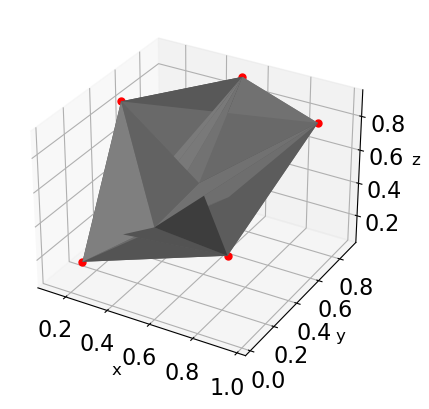

In [11]:
# %matplotlib widget

fig = plt.figure()
ax = plt.axes(projection ='3d')

rand.seed(3)
num_points = 11
points_list = []
for i in range(num_points):
    points_list.append(Point(rs(), rs(), rs()))
    points_list[i].plot_point(ax, col='r')




planes_list = []


for i, j, k in combinations(range(num_points), 3):


    test_plane = Plane(points_list[i], points_list[j], points_list[k])

    other_points = [x for x in points_list if (x!=points_list[i] and x!=points_list[j] and x!=points_list[k])]

    bools = test_plane.isLeft(other_points)

    if sum(bools) == 1 or sum(bools) == num_points-4:

        planes_list.append(test_plane)
        test_plane.plot_plane(ax)




plt.savefig('./figures/3D-NE.png', dpi=300)



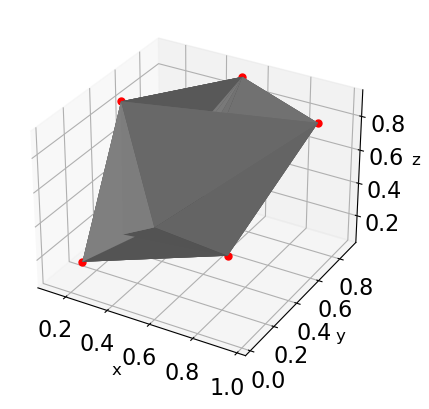

In [12]:
# %matplotlib widget

fig = plt.figure()
ax = plt.axes(projection ='3d')

rand.seed(3)
num_points = 11
points_list = []
for i in range(num_points):
    points_list.append(Point(rs(), rs(), rs()))
    points_list[i].plot_point(ax, col='r')




planes_list = []


for i, j, k in combinations(range(num_points), 3):


    test_plane = Plane(points_list[i], points_list[j], points_list[k])

    other_points = [x for x in points_list if (x!=points_list[i] and x!=points_list[j] and x!=points_list[k])]

    bools = test_plane.isLeft(other_points)

    if any(sum(bools) == [0, 1, num_points-3, num_points-4]):

        planes_list.append(test_plane)
        test_plane.plot_plane(ax)




plt.savefig('./figures/3D-SW.png', dpi=300)

